In [2]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/任正/Documents/CAPSTONE/Capstone/ctg-studies - 400K.csv'
data = pd.read_csv(file_path)

In [3]:
# Combine text data from key columns into a single column for analysis
text_columns = ['Study Title', 'Brief Summary', 'Primary Outcome Measures', 'Secondary Outcome Measures']
data['combined_text'] = data[text_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Display the first few rows of the combined text column
print(data[['combined_text']].head())


                                       combined_text
0  Anger Management and Violent Behavior in Adole...
1  Introducing Palliative Care (PC) Within the Tr...
2  Oral Ketone Monoester Supplementation and Rest...
3  Impact of Tight Glycaemic Control in Acute Myo...
4  Investigating the Effect of a Prenatal Family ...


In [4]:
# Basic Text Exploration
from collections import Counter
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Function to display basic text statistics
def basic_text_exploration(text_data):
    # Word count
    data['word_count'] = text_data.apply(lambda x: len(str(x).split()))
    print("Average word count:", data['word_count'].mean())
    
    # Word frequency
    all_words = ' '.join([text for text in text_data])
    all_words = all_words.split()
    word_freq = Counter(all_words)
    common_words = word_freq.most_common(20)
    print("Most common words:", common_words)

# Call the basic text exploration function
basic_text_exploration(data['combined_text'])


Average word count: 325.5853158388408
Most common words: [('of', 6750668), ('the', 5761743), ('and', 4341422), ('to', 3547623), ('in', 2971323), ('a', 1788778), ('with', 1422175), ('is', 1406972), ('for', 1247125), ('will', 1202689), ('The', 1200935), ('be', 1079304), ('at', 1079098), ('from', 987316), ('or', 911961), ('by', 896875), ('as', 868088), ('on', 854875), ('after', 786581), ('study', 716565)]


In [5]:
# Text cleaning
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Text cleaning function
def clean_text(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text.lower())
    filtered_text = [word for word in word_tokens if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_text)

# Apply text cleaning
data['cleaned_text'] = data['combined_text'].apply(lambda x: clean_text(x))

# Display the first few rows of the cleaned text column
print(data[['cleaned_text']].head())


                                        cleaned_text
0  anger management violent behavior adolescents ...
1  introducing palliative care pc within treatmen...
2  oral ketone monoester supplementation brain co...
3  impact tight glycaemic control acute myocardia...
4  investigating effect prenatal family planning ...


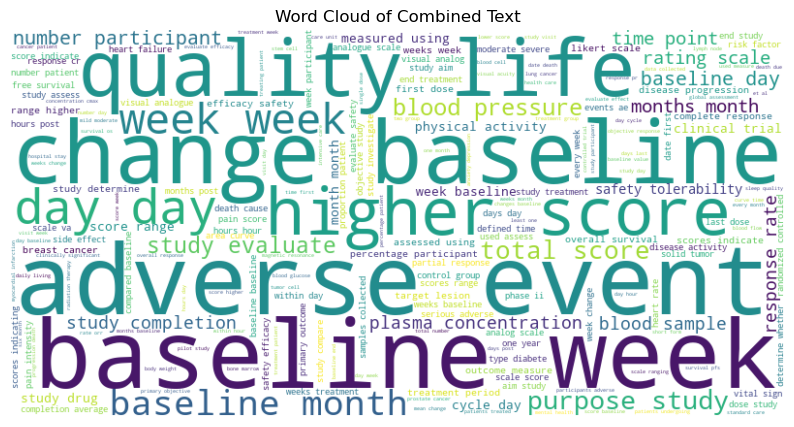

In [6]:
# Word Cloud Visualization
# Generate word cloud for the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['cleaned_text']))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Combined Text')
plt.show()


In [7]:
# Quantitative EDA on sex and age

In [8]:
# Convert 'Sex' column to numerical values: Male=1, Female=2, All=0
sex_mapping = {'MALE': 1, 'FEMALE': 2, 'ALL': 0}
data['Sex'] = data['Sex'].map(sex_mapping)

# Check for any remaining missing values or unmapped categories in 'Sex'
print(data['Sex'].unique())
print(data['Sex'].isnull().sum())


[ 0.  2.  1. nan]
1410


In [9]:
# Display unique values in the 'Age' column to understand its format
print(data['Age'].unique())

# Check for missing values or conversion issues
print(data['Age'].isnull().sum())

# Display basic statistics for the 'Age' column
print(data['Age'].describe())


['CHILD, ADULT, OLDER_ADULT' 'ADULT, OLDER_ADULT' 'ADULT' 'CHILD, ADULT'
 'OLDER_ADULT' 'CHILD' nan]
868
count                 462897
unique                     6
top       ADULT, OLDER_ADULT
freq                  302850
Name: Age, dtype: object


In [10]:
# Mapping the age categories to numerical values
age_mapping = {
    'CHILD': 1,
    'ADULT': 2,
    'OLDER_ADULT': 3,
    'CHILD, ADULT': 1.5,
    'ADULT, OLDER_ADULT': 2.5,
    'CHILD, ADULT, OLDER_ADULT': 2
}

# Convert the 'Age' column using the mapping
data['Age'] = data['Age'].map(age_mapping)

# Check for any remaining missing values in 'Age'
print(data['Age'].isnull().sum())

# Display basic statistics for the adjusted 'Age' column
print(data['Age'].describe())

868
count    462897.000000
mean          2.261380
std           0.425141
min           1.000000
25%           2.000000
50%           2.500000
75%           2.500000
max           3.000000
Name: Age, dtype: float64


In [11]:
# Handle Missing Values
data.dropna(subset=['Age'], inplace=True)

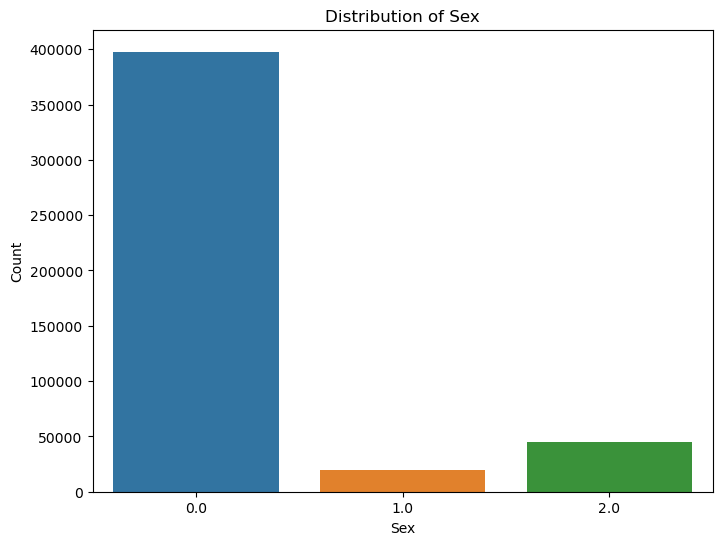

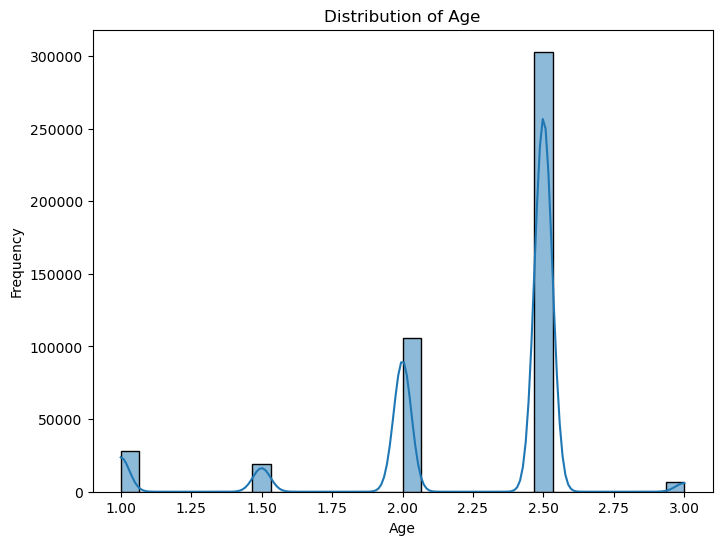

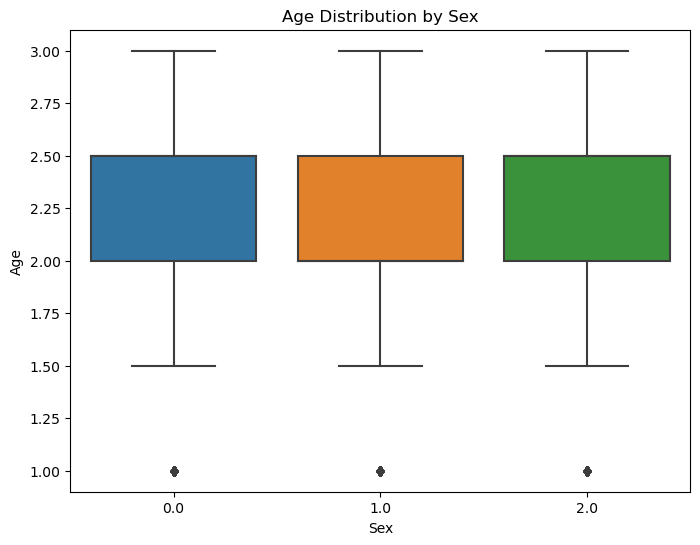

In [12]:
# Visualize the Data
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of 'Sex' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=data)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Plot the distribution of 'Age' column
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot the relationship between 'Sex' and 'Age' using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Age', data=data)
plt.title('Age Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()


In [13]:
# Group by 'Sex' and calculate descriptive statistics for 'Age'
age_sex_summary = data.groupby('Sex')['Age'].describe()
print(age_sex_summary)


        count      mean       std  min  25%  50%  75%  max
Sex                                                       
0.0  397772.0  2.267973  0.438520  1.0  2.0  2.5  2.5  3.0
1.0   19945.0  2.201705  0.348414  1.0  2.0  2.0  2.5  3.0
2.0   44638.0  2.231417  0.319759  1.0  2.0  2.5  2.5  3.0
